In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cust=pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv',sep='\t')
cust

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
for i in cust.columns:
    if cust[i].dtypes=='object':
        print(cust[i].value_counts())

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 663, dtype: int64


In [5]:
cust['Dt_Customer']=pd.to_datetime(cust['Dt_Customer'])
dates=[]
for i in cust['Dt_Customer']:
    i=i.date()
    dates.append(i)

In [6]:
days=[]
d=max(dates)
for i in dates:
    delta=d-i
    days.append(delta)
cust['Days']=days
cust['Days']=pd.to_numeric(cust['Days'],errors="coerce")

In [7]:
cust['Education']=cust['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate',
                                            'Graduation':'Graduate','Master':'Postgraduate',
                                            'PhD':'Postgraduate'})
cust['Education'].value_counts()

Graduate         1127
Postgraduate      856
Undergraduate     257
Name: Education, dtype: int64

In [8]:
cust['Living_with']=cust['Marital_Status'].replace({'Married':'Couple','Together':'Couple',
                                                      'Single':'Alone','Divorced':'Alone',
                                                      'Widow':'Alone','Alone':'Alone',
                                                      'Absurd':'Alone','YOLO':'Alone'})
cust['Living_with'].value_counts()

Couple    1444
Alone      796
Name: Living_with, dtype: int64

In [9]:
cust['Age']=2022-cust['Year_Birth']
print(cust['Age'].describe())
print(cust['Age'])

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64
0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: Age, Length: 2240, dtype: int64


In [10]:
cust['Children']=cust['Kidhome']+cust['Teenhome']
print(cust['Children'].describe())

count    2240.000000
mean        0.950446
std         0.751803
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Children, dtype: float64


In [11]:
cust['Spend']=cust['MntWines']+cust['MntFruits']+cust['MntMeatProducts']
+cust['MntFishProducts']+cust['MntSweetProducts']+cust['MntGoldProds']
print(cust['Spend'].describe())

count    2240.000000
mean      497.187946
std       521.064882
min         0.000000
25%        42.000000
50%       295.000000
75%       851.250000
max      2246.000000
Name: Spend, dtype: float64


In [12]:
cust['Family_Size']=cust['Living_with'].replace({'Couple':2,'Alone':1})+cust['Children']
print(cust['Family_Size'].describe())

count    2240.000000
mean        2.595089
std         0.906959
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: Family_Size, dtype: float64


In [13]:
cust["Is_Parent"]=np.where(cust['Children']> 0,1,0)

In [14]:
cust.drop(["Marital_Status","Dt_Customer",
           "Z_CostContact","Z_Revenue","Year_Birth","ID"],axis=1,inplace=True)

In [15]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Recency              2240 non-null   int64  
 5   MntWines             2240 non-null   int64  
 6   MntFruits            2240 non-null   int64  
 7   MntMeatProducts      2240 non-null   int64  
 8   MntFishProducts      2240 non-null   int64  
 9   MntSweetProducts     2240 non-null   int64  
 10  MntGoldProds         2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

In [16]:
cust.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days,Age,Children,Spend,Family_Size,Is_Parent
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,0.064286,0.013393,0.009375,0.149107,4.424054e+16,53.194196,0.950446,497.187946,2.595089,0.715179
std,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,0.245316,0.114976,0.096391,0.356274,2.006466e+16,11.984069,0.751803,521.064882,0.906959,0.451430
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,26.000000,0.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.944080e+16,45.000000,0.000000,42.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,52.000000,1.000000,295.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.920560e+16,63.000000,1.000000,851.250000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,129.000000,3.000000,2246.000000,5.000000,1.000000


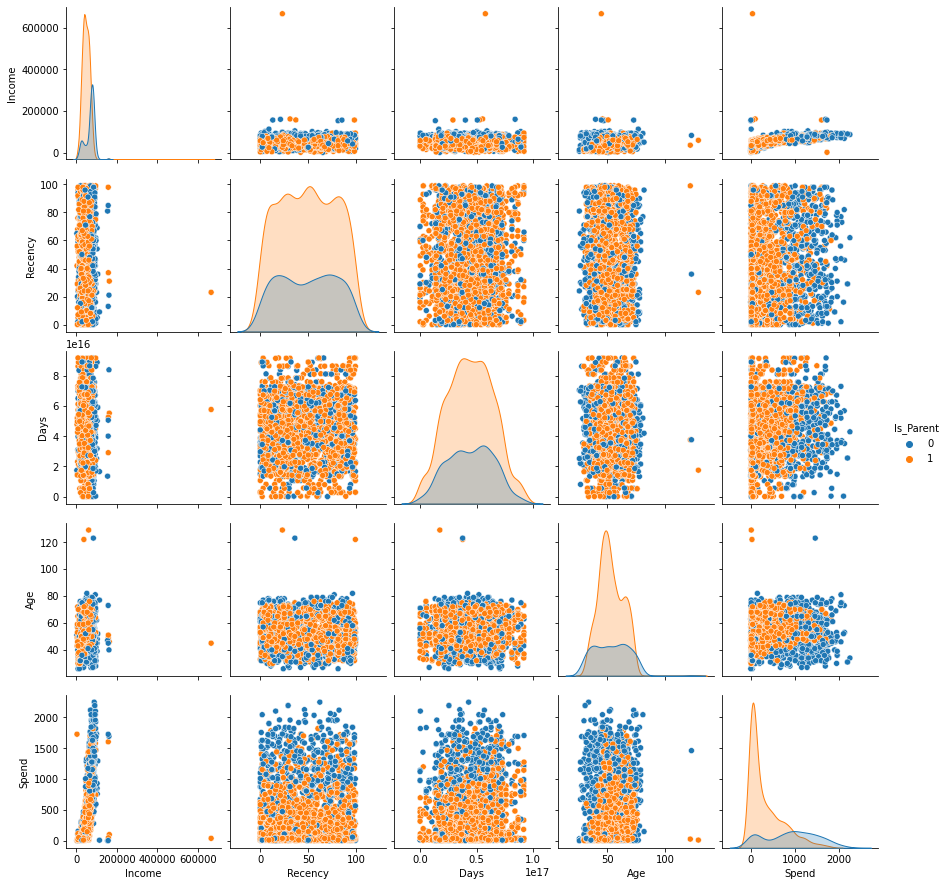

In [17]:
plot=["Income","Recency","Days","Age","Spend","Is_Parent"]
sns.pairplot(cust[plot],hue='Is_Parent')

In [18]:
cust=cust[(cust["Age"]<90)]
cust=cust[(cust["Income"]<600000)]
print("The total number of data-points after removing the outliers are:",len(cust))

The total number of data-points after removing the outliers are: 2212


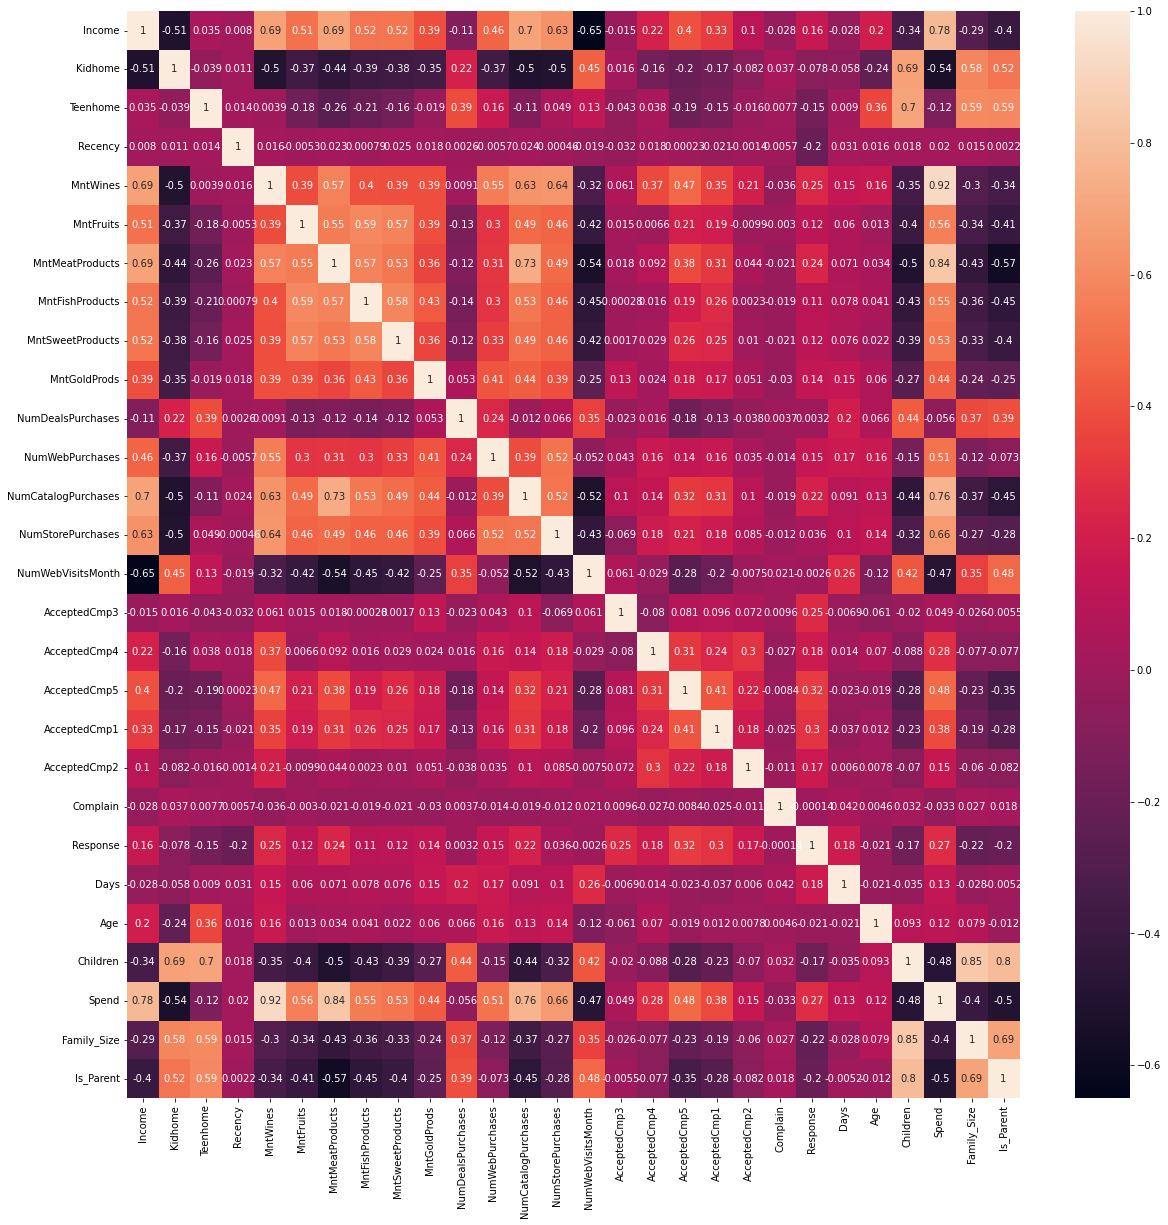

In [19]:
plt.figure(figsize=(20,20))  
sns.heatmap(cust.corr(),annot=True)
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [21]:
label=LabelEncoder()
for i in cust.columns:
    if cust[i].dtypes=='object':
        cust[i]=label.fit_transform(cust[i])
cust.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,Days,Living_with,Age,Children,Spend,Family_Size,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,83894400000000000,0,65,0,1269,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,10800000000000000,0,68,2,18,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,40780800000000000,1,57,0,602,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,5616000000000000,1,38,1,35,3,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,27734400000000000,1,41,1,334,3,1


In [22]:
cust.drop(['Complain','Response'],axis=1,inplace=True)

In [23]:
st=StandardScaler()
st.fit_transform(cust)
scaled_cust=pd.DataFrame(st.transform(cust),columns=cust.columns)
scaled_cust.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Days,Living_with,Age,Children,Spend,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,-0.280175,-0.261914,-0.117256,1.973583,-1.349603,1.018352,-1.264598,1.478249,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.280175,-0.261914,-0.117256,-1.665144,-1.349603,1.274785,1.404572,-0.922325,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.280175,-0.261914,-0.117256,-0.172664,0.740959,0.334530,-1.264598,0.198327,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.280175,-0.261914,-0.117256,-1.923210,0.740959,-1.289547,0.069987,-0.889703,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,-0.280175,-0.261914,-0.117256,-0.822130,0.740959,-1.033114,0.069987,-0.315945,0.449070,0.632456


In [24]:
from sklearn.decomposition import PCA

In [25]:
pca=PCA(n_components=3)
pca.fit(scaled_cust)
pca_cust=pd.DataFrame(pca.transform(scaled_cust),columns=(['Col1',"Col2",'Col3']))
pca_cust.describe().T

,count,mean,std,min,25%,50%,75%,max
Col1,2212.0,8.994212e-17,2.937152,-5.914434,-2.564667,-0.827082,2.246541,8.373965
Col2,2212.0,-4.497106e-17,1.715855,-4.275581,-1.353648,-0.161640,1.236546,6.110460
Col3,2212.0,1.445498e-17,1.320309,-3.214879,-0.601430,-0.035891,0.267643,9.152462


In [26]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

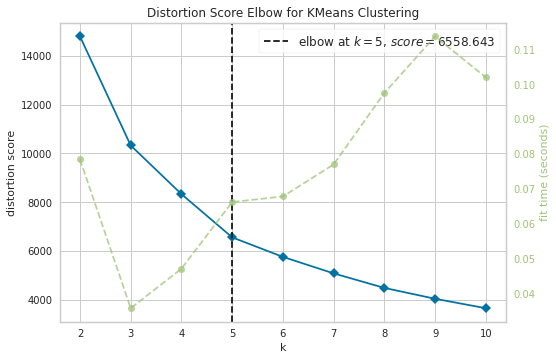

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
elbow_m=KElbowVisualizer(KMeans(),k=10)
elbow_m.fit(pca_cust)
elbow_m.show()

In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
ag=AgglomerativeClustering(n_clusters=5)
ag_cust=ag.fit_predict(pca_cust)

In [31]:
from sklearn.metrics import silhouette_samples,silhouette_score
print(silhouette_score(pca_cust,ag.labels_,metric='euclidean'))

0.358591206379173


In [35]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(pca_cust,ag.labels_)

1587.4332671043958

In [36]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(pca_cust,ag.labels_)

0.919225249465341

In [37]:
pca_cust['cluster']=ag_cust
cust['cluster']=ag_cust

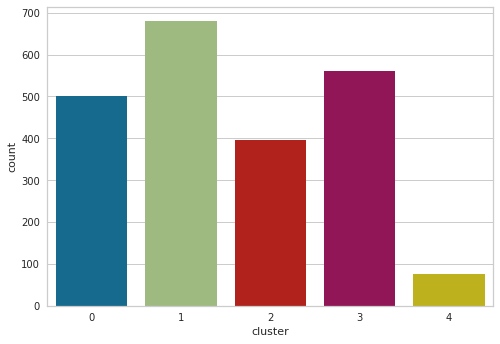

In [38]:
sns.countplot(cust['cluster'])
plt.show()

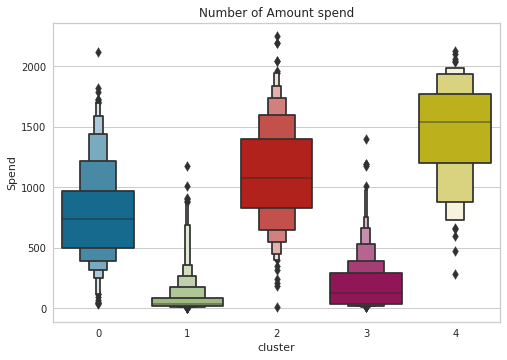

In [39]:
plt.figure()
pl=sns.boxenplot(x=cust["cluster"],y=cust["Spend"])
pl.set_title("Number of Amount spend")
plt.show()

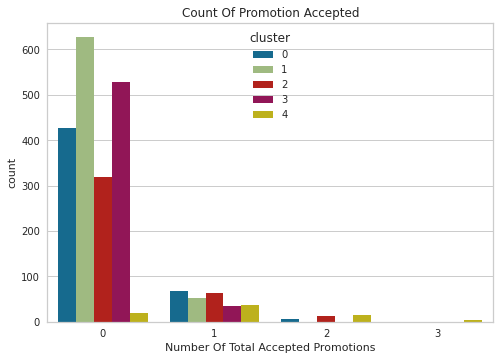

In [40]:
cust["Total_Promos"]=cust["AcceptedCmp1"]+cust["AcceptedCmp2"]+cust["AcceptedCmp3"]
+cust["AcceptedCmp4"]+cust["AcceptedCmp5"]
plt.figure()
pl = sns.countplot(x=cust["Total_Promos"],hue=cust["cluster"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

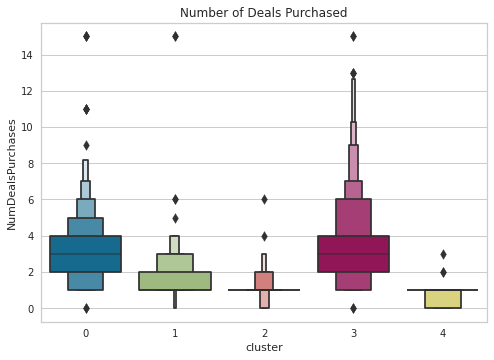

In [41]:
plt.figure()
pl=sns.boxenplot(y=cust["NumDealsPurchases"],x=cust["cluster"])
pl.set_title("Number of Deals Purchased")
plt.show()

<Figure size 576x396 with 0 Axes>

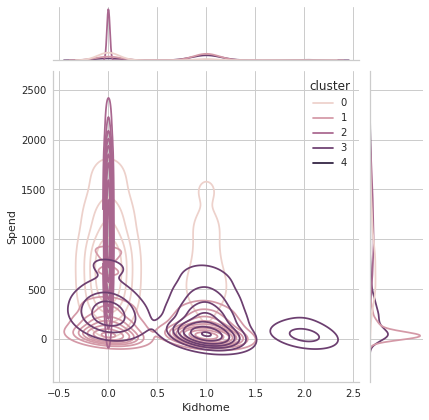

<Figure size 576x396 with 0 Axes>

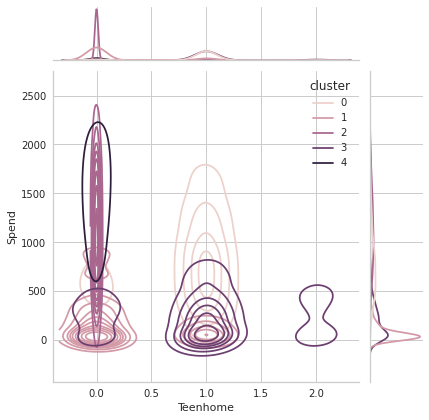

<Figure size 576x396 with 0 Axes>

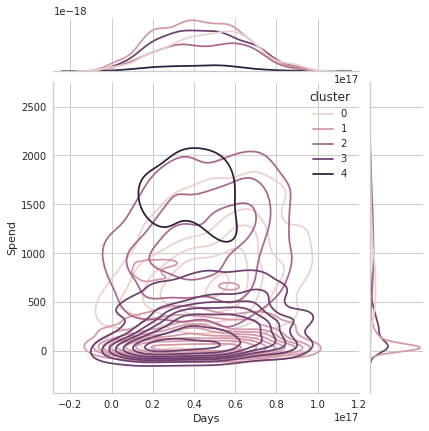

<Figure size 576x396 with 0 Axes>

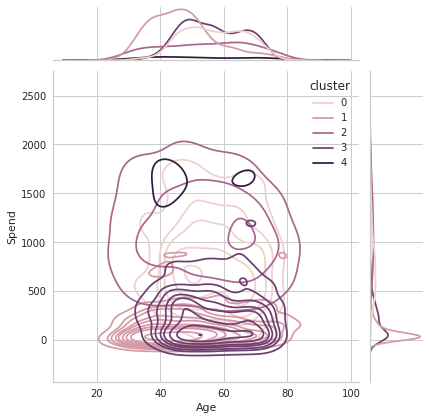

<Figure size 576x396 with 0 Axes>

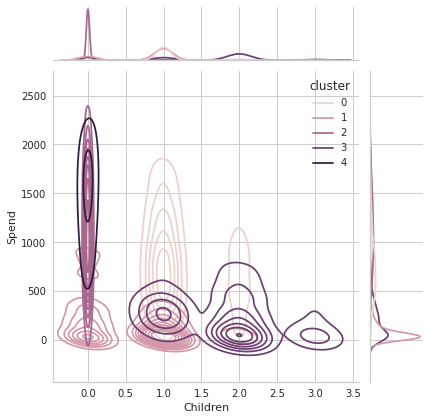

<Figure size 576x396 with 0 Axes>

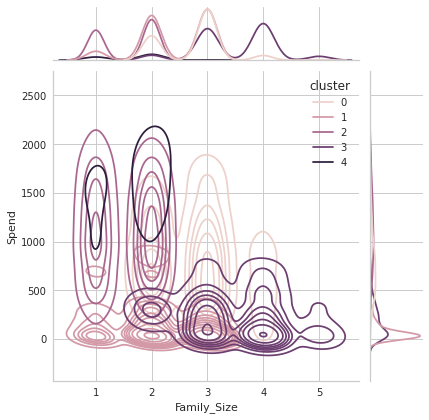

<Figure size 576x396 with 0 Axes>

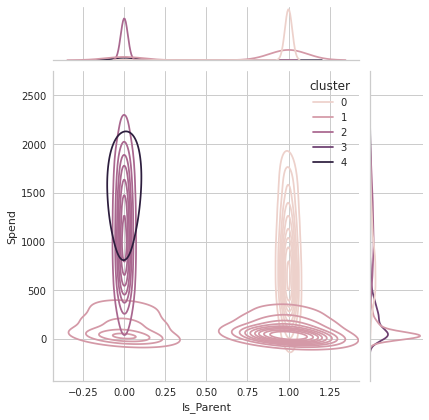

<Figure size 576x396 with 0 Axes>

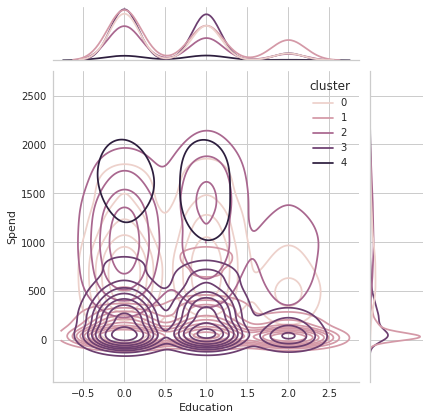

<Figure size 576x396 with 0 Axes>

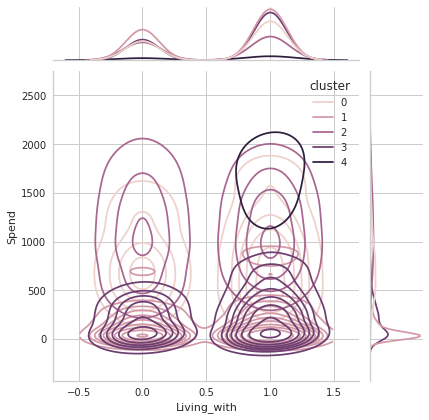

In [42]:
Personal=["Kidhome","Teenhome","Days","Age","Children","Family_Size",
            "Is_Parent","Education","Living_with"]
for i in Personal:
    plt.figure()
    sns.jointplot(x=cust[i],y=cust["Spend"],hue=cust["cluster"],kind="kde")
    plt.show()